<a href="https://colab.research.google.com/github/manviupadhyay2/AI_Project/blob/main/AI_Project_07401172022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install advertools
!pip install ua_parser
!pip install squarify
import advertools as adv
import pandas as pd
from ua_parser import user_agent_parser
import pyarrow.parquet as pq
import pyarrow
from ipywidgets import interact
import matplotlib.pyplot as plt
import ua_parser
pd.options.display.max_columns = None
import squarify


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.1/312.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 8.6 MB/s eta 0:00:00


In [ ]:
%%time
adv.logs_to_df(
    log_file='log_file.log',
    output_file='output_file.parquet',
    errors_file='errors_file.txt',
    log_format='combined')

Parsed          36,078 lines.
CPU times: user 214 ms, sys: 45.2 ms, total: 259 ms
Wall time: 334 ms


In [ ]:
logs_df = pd.read_parquet('output_file.parquet')
logs_df['datetime'] = pd.to_datetime(logs_df['datetime'],
                                     format='%d/%b/%Y:%H:%M:%S %z')

In [ ]:
with open('log_file.log', 'r') as file:
    for i in range(7):

        print(file.readline())

87.116.74.253 - - [28/Feb/2022:14:04:44 +0200] "POST /wp-admin/admin-ajax.php HTTP/2.0" 200 47 "https://nargile.bg/wp-admin/admin.php?page=wc-settings" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.109 Safari/537.36"

91.196.124.220 - - [28/Feb/2022:14:04:47 +0200] "POST /wp-cron.php?doing_wp_cron=1646049887.2476160526275634765625 HTTP/1.1" 200 - "https://nargile.bg/wp-cron.php?doing_wp_cron=1646049887.2476160526275634765625" "WordPress/5.9.1; https://nargile.bg"

91.196.124.220 - - [28/Feb/2022:14:06:45 +0200] "POST /wp-cron.php?doing_wp_cron=1646050005.3947830200195312500000 HTTP/1.1" 200 - "https://nargile.bg/wp-cron.php?doing_wp_cron=1646050005.3947830200195312500000" "WordPress/5.9.1; https://nargile.bg"

87.116.74.253 - - [28/Feb/2022:14:06:44 +0200] "POST /wp-admin/admin-ajax.php HTTP/2.0" 200 47 "https://nargile.bg/wp-admin/admin.php?page=wc-settings" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (

In [ ]:
file_path = 'log_file.log'

with open(file_path, 'r') as file:
    row_count = sum(1 for _ in file)

print(f"Number of rows in the file: {row_count}")

Number of rows in the file: 61383


In [ ]:
print(logs_df.describe())
print("-----------^^^^^^^^^^--------")
print(logs_df.info())

               size
count  3.372700e+04
mean   3.883762e+04
std    7.184961e+04
min    1.000000e+00
25%    2.786000e+03
50%    1.650100e+04
75%    4.320100e+04
max    1.636838e+06
-----------^^^^^^^^^^--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36075 entries, 0 to 36074
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype                                
---  ------      --------------  -----                                
 0   client      36075 non-null  object                               
 1   userid      36075 non-null  object                               
 2   datetime    36075 non-null  datetime64[ns, pytz.FixedOffset(120)]
 3   method      36075 non-null  category                             
 4   request     36075 non-null  object                               
 5   status      36075 non-null  category                             
 6   size        33727 non-null  float64                              
 7   referer     36075 non-null  object    

In [ ]:
host_df = adv.reverse_dns_lookup(logs_df['client'])
host_df.head(5)

,ip_address,count,cum_count,perc,cum_perc,hostname,aliaslist,ipaddrlist,errors
0,130.204.199.252,1197,1197,0.033181,0.033181,602ad0cd481f.softphone.blizoo.bg,,130.204.199.252,None
1,212.39.89.183,1112,2309,0.030825,0.064006,212-39-89-183.ip.btc-net.bg,,212.39.89.183,None
2,46.10.120.188,1087,3396,0.030132,0.094137,46-10-120-188.ip.btc-net.bg,,46.10.120.188,None
3,212.39.89.155,959,4355,0.026584,0.120721,212-39-89-155.ip.btc-net.bg,,212.39.89.155,None
4,91.139.164.207,831,5186,0.023035,0.143756,91-139-164-207.sf.ddns.bulsat.com,,91.139.164.207,None


In [ ]:
 #Calculate the top visitors by counting unique client IP addresses
top_visitors = logs_df['client'].value_counts().head(10)

# Calculate the frequency of requests by counting the occurrences of each request
frequency_of_requests = logs_df['request'].value_counts().head(10)

print("Top Visitors:")
print(top_visitors)

print("\nFrequency of Requests:")
print(frequency_of_requests)

Top Visitors:
130.204.199.252    1197
212.39.89.183      1112
46.10.120.188      1087
212.39.89.155       959
91.139.164.207      831
37.63.1.109         762
46.238.56.74        705
212.39.89.57        679
31.211.159.44       622
109.107.88.160      607
Name: client, dtype: int64

Frequency of Requests:
/wp-content/uploads/2021/05/HLGN-Logo.png                                               455
/?wc-ajax=get_refreshed_fragments                                                       453
/wp-admin/admin-ajax.php                                                                316
/                                                                                       302
/?nitroWebhook=cache_ready&token=fdccd0f43d6699b0ad7852228297d999                       162
/category/nargileta/                                                                    125
/wp-content/plugins/woocommerce-econt/inc/css/colorbox.css?ver=5.9.1                    106
/wp-includes/js/jquery/ui/core.min.js?ver=1.13.1   

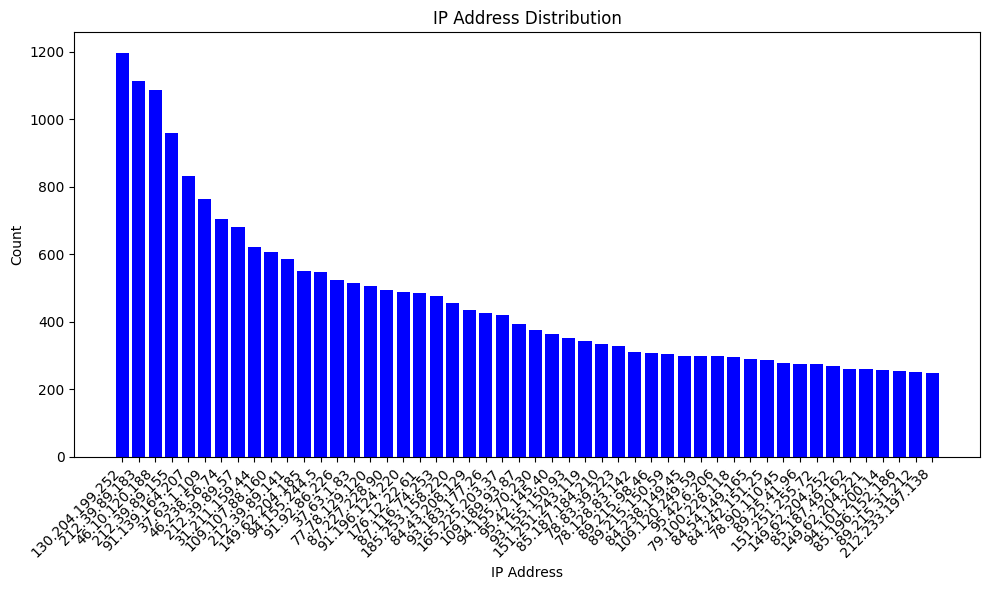

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(host_df['ip_address'].head(50), host_df['count'].head(50), color='blue')
plt.xlabel('IP Address')
plt.ylabel('Count')
plt.title('IP Address Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

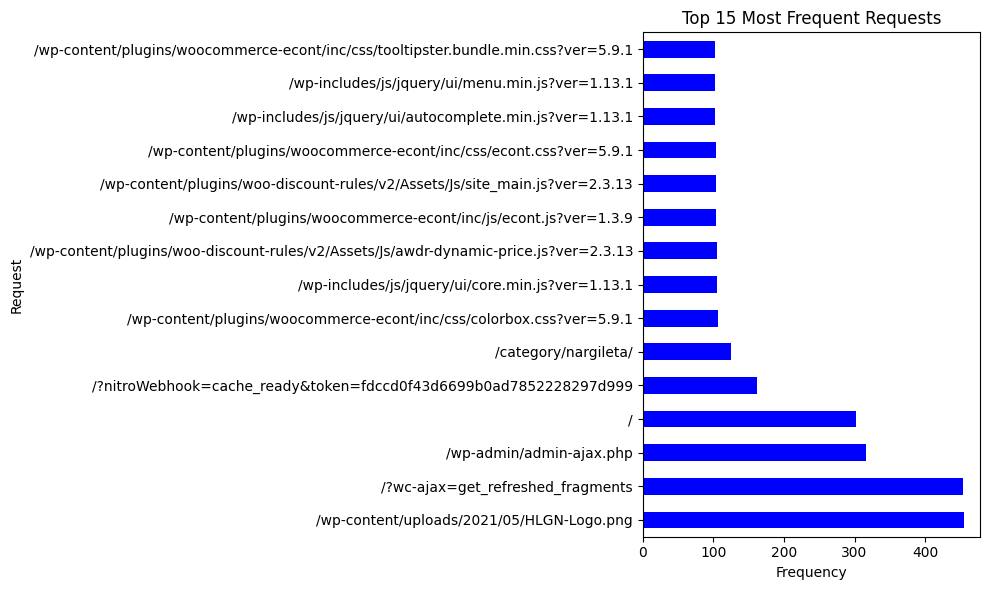

In [ ]:
# Calculate the frequency of requests by counting the occurrences of each request
frequency_of_requests = logs_df['request'].value_counts().head(15)
# Plot the data using a bar plot
plt.figure(figsize=(10, 6))
frequency_of_requests.plot(kind='barh', color='blue')
plt.ylabel('Request')
plt.xlabel('Frequency')
plt.title('Top 15 Most Frequent Requests')
plt.tight_layout()
plt.show()


  status  count
0    200  33840
1    206      4
2    301    164
3    302     27
4    304   1254
5    401      3
6    403      3
7    404    670
8    406     31
9    500     79


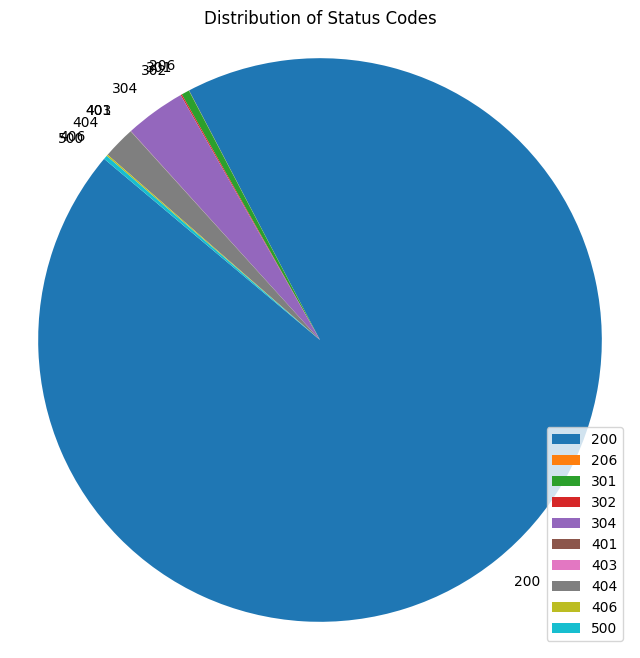

In [ ]:
status_df = logs_df.groupby('status').size().reset_index(name='count')
print(status_df)
# Plot the data using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_df['count'], labels=status_df['status'], startangle=140)
plt.title('Distribution of Status Codes')
plt.axis('equal')
plt.legend(loc='lower right')
plt.show()

            client  hour  request_count
0   104.143.83.241    13              6
1  104.196.137.185    14              1
2  104.196.146.182    12              1
3    104.196.193.2    18              1
4    104.196.193.2    19              1
            client  day_of_week  request_count
0   104.143.83.241            0              6
1  104.196.137.185            0              1
2  104.196.146.182            0              1
3    104.196.193.2            0              2
4    104.196.48.73            0              2


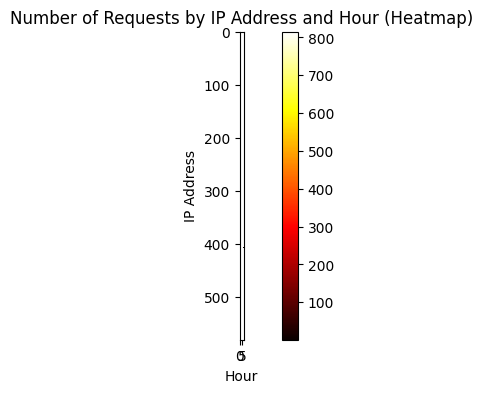

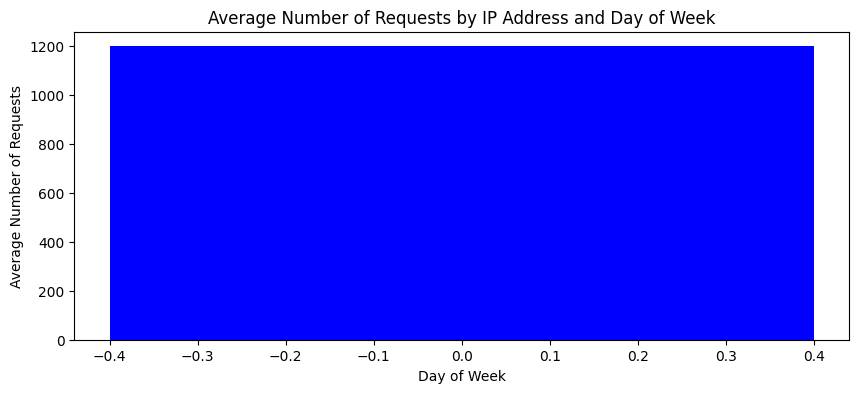

In [ ]:
logs_df['datetime'] = pd.to_datetime(logs_df['datetime'])

# Extract hour and day of the week from the "datetime" column
logs_df['hour'] = logs_df['datetime'].dt.hour
logs_df['day_of_week'] = logs_df['datetime'].dt.dayofweek

# Group by IP address and hour, and calculate the count of requests
ip_hourly_counts = logs_df.groupby(['client', 'hour'])['hour'].count().reset_index(name='request_count')

# Group by IP address and day of the week, and calculate the average request count
ip_weekly_avg = logs_df.groupby(['client', 'day_of_week'])['day_of_week'].count().reset_index(name='request_count')

print(ip_hourly_counts.head(5))
print(ip_weekly_avg.head(5))

# Convert the "datetime" column to datetime data type, setting utc=True
logs_df['datetime'] = pd.to_datetime(logs_df['datetime'], utc=True)

# Extract hour and day of the week from the "datetime" column
logs_df['hour'] = logs_df['datetime'].dt.hour
logs_df['day_of_week'] = logs_df['datetime'].dt.dayofweek

# Group by IP address and hour, and calculate the count of requests
ip_hourly_counts = logs_df.groupby(['client', 'hour'])['hour'].count().reset_index(name='request_count')

# Create the heatmap
plt.figure(figsize=(10, 4))
plt.imshow(ip_hourly_counts.pivot_table(index='client', columns='hour', values='request_count', aggfunc=sum), cmap='hot')

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('IP Address')
plt.title('Number of Requests by IP Address and Hour (Heatmap)')
plt.colorbar()

# Group by IP address and day of the week, and calculate the average request count
ip_weekly_avg = logs_df.groupby(['client', 'day_of_week'])['day_of_week'].count().reset_index(name='request_count')

# Visualize the weekly average request counts
plt.figure(figsize=(10, 4))
plt.bar(ip_weekly_avg['day_of_week'], ip_weekly_avg['request_count'], color='blue')

# Add labels and title
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Requests')
plt.title('Average Number of Requests by IP Address and Day of Week')

# Show the plots
plt.show()

   browser  total_hits
0   Chrome       17485
5   Safari        9415
4    Other        6009
3    Opera        1578
2  Firefox         991
1     Edge         597


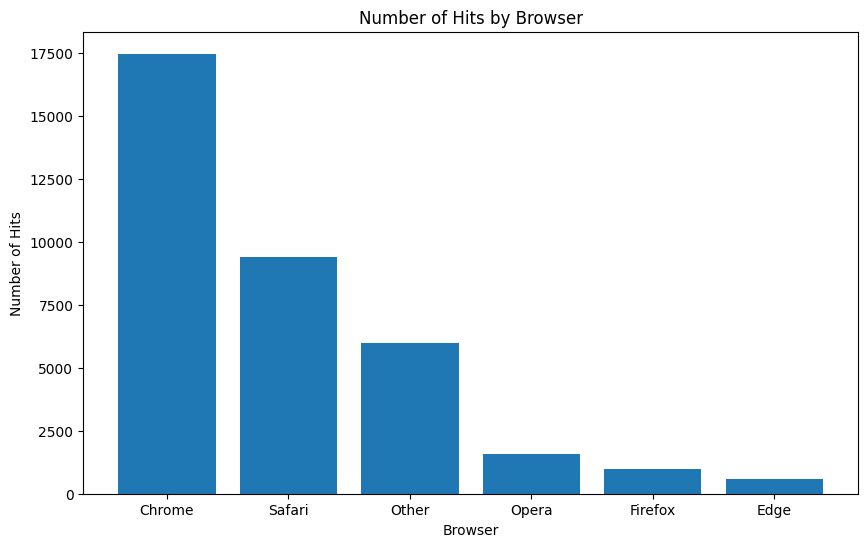

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
!pip install user_agents
import user_agents
from user_agents import parse
# Parse user agents using the user-agents library
def extract_browser(user_agent):
    ua = parse(user_agent)
    browser_family = ua.browser.family.lower()

    if 'chrome' in browser_family:
        return 'Chrome'
    elif 'firefox' in browser_family:
        return 'Firefox'
    elif 'safari' in browser_family:
        return 'Safari'
    elif 'edge' in browser_family:
        return 'Edge'
    elif 'opera' in browser_family:
        return 'Opera'
    elif 'brave' in browser_family:
        return 'Brave'
    elif 'internet explorer' in browser_family or 'msie' in browser_family:
        return 'Internet Explorer'
    else:
        return 'Other'

logs_df['browser'] = logs_df['user_agent'].apply(extract_browser)

# Group data by browser and count hits
browser_hits = logs_df.groupby('browser').size().reset_index(name='total_hits')

# Sort by total hits
browser_hits = browser_hits.sort_values(by=['total_hits'], ascending=False)
print(browser_hits)
# Create a bar chart of the number of hits for each browser
plt.figure(figsize=(10, 6))
plt.bar(browser_hits['browser'], browser_hits['total_hits'])

# Add labels and title
plt.xlabel('Browser')
plt.ylabel('Number of Hits')
plt.title('Number of Hits by Browser')

# Show the plot
plt.show()

site  Unknown  com.google.android.googlequicksearchbox  \
hour                                                     
19      106.0                                      NaN   
18      227.0                                      NaN   
17      172.0                                      1.0   
16      261.0                                      NaN   
15      150.0                                      NaN   

site  cpcalendars.nargile.bg  cpcontacts.nargile.bg  l.instagram.com  \
hour                                                                   
19                       NaN                    NaN              4.0   
18                       NaN                    NaN              7.0   
17                       NaN                    NaN             10.0   
16                       NaN                    NaN             20.0   
15                       NaN                    NaN              NaN   

site  m.abv.bg  m.facebook.com  mail.nargile.bg  myactivity.google.com  \
hour          

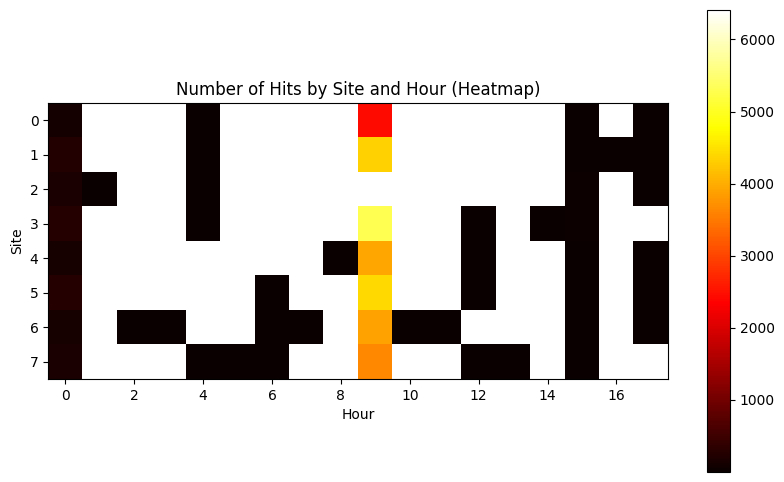

In [ ]:
# Parse the referer using the function defined above
def extract_site(referer):
    if pd.isna(referer):
        return 'Direct'
    else:
        referer_parts = referer.split('/')
        if len(referer_parts) >= 3:
            return referer_parts[2]
        else:
            return 'Unknown'

logs_df['site'] = logs_df['referer'].apply(extract_site)

# Group data by site and hour and count hits
site_hourly_hits = logs_df.groupby(['site', 'hour']).size().reset_index(name='hits')

# Pivot the table for site distribution per hour
site_hourly_pivot = site_hourly_hits.pivot(index='hour', columns='site', values='hits')

# Sort by total hits for each hour
site_hourly_pivot = site_hourly_pivot.sort_values(by=['hour'], ascending=False)
print(site_hourly_pivot.head(5))
# Create a heatmap of the number of hits for each site and hour
plt.figure(figsize=(10, 6))
plt.imshow(site_hourly_pivot, cmap='hot')

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Site')
plt.title('Number of Hits by Site and Hour (Heatmap)')
plt.colorbar()
plt.show()

   hour  total_hits
0    12        3832
1    13        4045
2    14        4698
3    15        4123
4    16        5606
5    17        6623
6    18        4599
7    19        2549


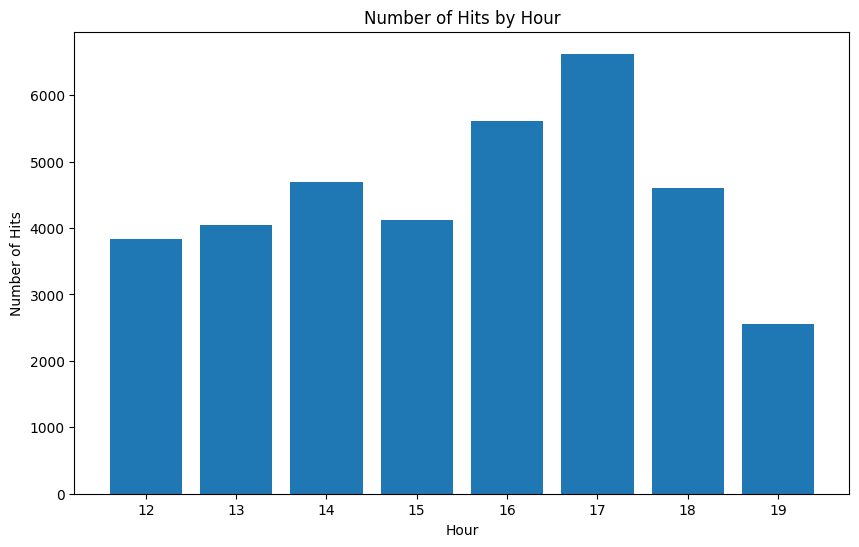

In [ ]:
# Group data by hour and count hits
hourly_hits = logs_df.groupby('hour').size().reset_index(name='total_hits')
print(hourly_hits)
# Sort by total hits
#hourly_hits = hourly_hits.sort_values(by=['total_hits'], ascending=False)

# Create a bar chart of the number of hits for each hour
plt.figure(figsize=(10, 6))
plt.bar(hourly_hits['hour'], hourly_hits['total_hits'])

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Number of Hits')
plt.title('Number of Hits by Hour')

# Show the plot
plt.show()

In [ ]:
%%time
ua_df = pd.json_normalize([user_agent_parser.Parse(ua) for ua in logs_df['user_agent']])
ua_df.columns = 'ua_' + ua_df.columns.str.replace('user_agent\.', '', regex=True)

CPU times: user 815 ms, sys: 11.9 ms, total: 827 ms
Wall time: 976 ms


In [ ]:
ua_df.head(100)


,ua_string,ua_family,ua_major,ua_minor,ua_patch,ua_os.family,ua_os.major,ua_os.minor,ua_os.patch,ua_os.patch_minor,ua_device.family,ua_device.brand,ua_device.model
0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Chrome,98,0,4758,Mac OS X,10,15,7,None,Mac,Apple,Mac
1,WordPress/5.9.1; https://nargile.bg,WordPress,5,9,1,Other,None,None,None,None,Spider,Spider,Desktop
2,WordPress/5.9.1; https://nargile.bg,WordPress,5,9,1,Other,None,None,None,None,Spider,Spider,Desktop
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Chrome,98,0,4758,Mac OS X,10,15,7,None,Mac,Apple,Mac
4,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,Googlebot,2,1,None,Other,None,None,None,None,Spider,Spider,Desktop
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Chrome,98,0,4758,Windows,10,None,None,None,Other,None,None
96,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Chrome,98,0,4758,Windows,10,None,None,None,Other,None,None
97,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Chrome,98,0,4758,Windows,10,None,None,None,Other,None,None
98,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Chrome,98,0,4758,Windows,10,None,None,None,Other,None,None


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Create a new dataframe that only contains the `ua_family` and `ua_os.family` columns
browser_os_df = ua_df[['ua_family', 'ua_os.family']]
# Count the number of occurrences of each browser and operating system combination
browser_os_counts = browser_os_df.groupby(['ua_family', 'ua_os.family']).size().reset_index(name='count')
print(browser_os_counts.head(10))

                 ua_family ua_os.family  count
0                AhrefsBot        Other     19
1               Apple Mail     Mac OS X      1
2             AwarioRssBot        Other      1
3                   Chrome      Android     96
4                   Chrome     Mac OS X    512
5                   Chrome      Windows   5754
6            Chrome Mobile      Android   9246
7    Chrome Mobile WebView      Android   1076
8        Chrome Mobile iOS          iOS    801
9  DuckDuckGo-Favicons-Bot        Other      1


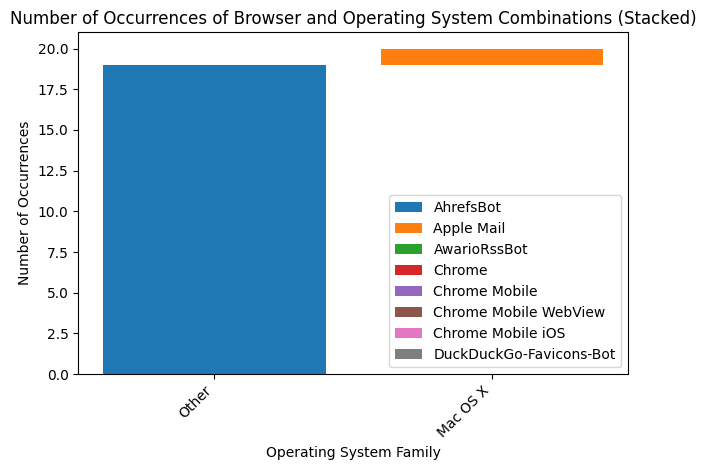

In [ ]:
df = browser_os_counts.head(10)

# Get unique browser names for legend
browser_names = df['ua_family'].unique()

# Initialize the bottom for stacking
bottom = None

# Create a stacked bar chart
for browser_name in browser_names:
    browser_data = df[df['ua_family'] == browser_name]
    plt.bar(browser_data['ua_os.family'], browser_data['count'], label=browser_name, bottom=bottom)
    if bottom is None:
        bottom = browser_data['count']
    else:
        bottom += browser_data['count']

# Add labels and title
plt.xlabel('Operating System Family')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences of Browser and Operating System Combinations (Stacked)')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()
